Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Filippova Anastasiia"
COLLABORATORS = ""

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 1
    x = x0 - f(x0) / fder(x0)
    while (abs(x - x0) > eps) and (niter < maxiter):
        x0 = x
        x = x0 - f(x0) / fder(x0)
        niter = niter + 1
    return x, niter

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

In [5]:
xx = np.array(range(1,16))
len(xx)

15

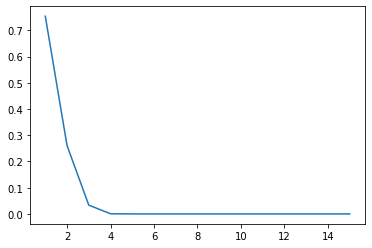

In [6]:
zz = [newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4, eps=0, maxiter=z)[0] for z in xx]
zz = [np.log(1+abs(1-x)) for x in zz]
import matplotlib.pyplot as plt
plt.plot(xx, zz, '-')


# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [7]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 1
    x = x0 - f(x0) / fder(x0)
    while (abs(x - x0) > eps) and (niter < maxiter):
        x0 = x
        if fder(x0) == 0:
            return x, niter
        x = x0 - m * f(x0) / fder(x0)
        niter = niter + 1
    return x, niter

In [8]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    
### BEGIN HIDDEN TESTS
num_iters = []

for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    num_iters.append(nit)
    
assert num_iters[3] < 10
assert all(_ > 10 for _ in num_iters[:3])
assert all(_ > 10 for _ in num_iters[4:])
### END HIDDEN TESTS

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.

In [9]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**2,
                         lambda x: 2*(x**2 - 1) * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    print(xx, nit)

1.0000000009557763 31
1.0 6
1.0000000002781144 31
0.6153846153846154 10000
3.730188966007426 10000
-1.130087533705506 10000


# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [10]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Производная `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x0 = X0.copy()
    n = len(x0)
    x = x0.reshape(-1, 1) - np.linalg.inv(jcb(x0)) @ F(x0).reshape(-1,1)
    it = 0
    while np.linalg.norm(x0-x.reshape(n)) > eps and it < maxiter:
        x0 = x.reshape(n)
        x = x0.reshape(-1, 1) - np.linalg.inv(jcb(x0)) @ F(x0).reshape(-1,1)
        it += 1
    return x.reshape(n), it

In [11]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1, X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                       [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10


### BEGIN HIDDEN TESTS
def func(X):
    x,y,z=X
    return np.array([x**2+y**2+z**2-25, x*y+y*z+z*x-5,x+y-3])

def jac(X):
    x,y,z=X
    return np.array([[2*x, 2*y, 2*z], [y+z, x+z, x+y], [1, 1, 0]])

xx, nit = newton_system(func, jac, np.asarray([4., 0., 3.]))
assert_allclose(xx, np.array([0.5*(3+np.sqrt(12*np.sqrt(35)-47)),
                              0.5*(3-np.sqrt(12*np.sqrt(35)-47)), 
                              np.sqrt(35)-3]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 4., 3.]))
assert_allclose(xx, np.array([0.5*(3-np.sqrt(12*np.sqrt(35)-47)),
                              0.5*(3+np.sqrt(12*np.sqrt(35)-47)),
                              np.sqrt(35)-3]), atol=1e-5)
assert nit < 10
### END HIDDEN TESTS